**Diamonds**
==========

Context
--------

Этот классический набор данных содержит цены и прочие атрибуты почти 54,000 бриллиантов. Это отличный набор для начинающих учиться работать с анализом данных и визуализацией.

Content
-------

price -  цена в долларах США (\$326--\$18,823)

carat - каратный вес алмаза (0.2--5.01)

cut - качество огранки (удовлетворительное, хорошее, очень хорошее, Премиум, идеал)

color - цвет бриллианта, от J (худший) до D (лучшее)

clarity - четкость алмаза (I1 (худший), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (лучший))

х - Длина в мм (0--10.74)

y - ширина в мм (0--58.9)

z - глубина в мм (0--31.8)

depth -  общая глубина процентах = z / mean(x, y) = 2 * z / (x + y) (43--79)

table - Ширина верхней части алмаза относительно широкой точки (43--95)

Набор данных содержит 53940 выборок и 11 признаков, предназначенных для прогнозирования цены бриллианта в зависимости от признаков.

In [1]:
#numpy – матричные операции
#matplotlib – научная графика
#pandas – таблицы (DataFrame) для анализа данных
#scikit-learn – алгоритмы машинного обучения

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Считываем базу данных из файла

In [2]:
url = 'https://raw.githubusercontent.com/EkaterinaZubareva/MachineLearning/master/diamonds.csv'
data = pd.read_csv(url, sep = ',', engine='python')

In [3]:
type(data)

pandas.core.frame.DataFrame

Вывод данных:

In [4]:

data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [5]:
print(data)

       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
5               6   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94   
6               7   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95   
7               8   0.26  Very Good     H     SI1   61.9   55.0    337  4.07   
8               9   0.22       Fair     E     VS2   65.1   61.0    337  3.87   
9              10   0.23  Very Good     H     VS1   59.4   61.0    338  4.00   
10             11   0.30       Good     J     SI1   64.0   55.0    339  4.25   
11             12   0.23      Ideal     

Вывести первые 5 строк:

In [6]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Вывечти последние 5 строк:

In [7]:
data.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


Вывести размерность таблицы и названия всех столбцов:

In [8]:
print(data.shape)
print(data.columns)

(53940, 11)
Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')


таблица содержит 53940 строк и 11 столбцов

In [9]:
data.index

RangeIndex(start=0, stop=53940, step=1)

Вывести значение, находящееся в строке 53935 и столбце carat:

In [10]:
data.at[53935, 'carat']

0.71999999999999997

Вывести столбец carat полностью:

In [11]:
data['carat']

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
5        0.24
6        0.24
7        0.26
8        0.22
9        0.23
10       0.30
11       0.23
12       0.22
13       0.31
14       0.20
15       0.32
16       0.30
17       0.30
18       0.30
19       0.30
20       0.30
21       0.23
22       0.23
23       0.31
24       0.31
25       0.23
26       0.24
27       0.30
28       0.23
29       0.23
         ... 
53910    0.70
53911    0.57
53912    0.61
53913    0.80
53914    0.84
53915    0.77
53916    0.74
53917    0.90
53918    0.76
53919    0.76
53920    0.70
53921    0.70
53922    0.70
53923    0.73
53924    0.73
53925    0.79
53926    0.71
53927    0.79
53928    0.79
53929    0.71
53930    0.71
53931    0.71
53932    0.70
53933    0.70
53934    0.72
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64

Вывести значение, находящееся в строке 3 и столбце carat:

In [12]:
data['carat'][3]

0.28999999999999998

Вывести тип данных в столбце clarity:

In [13]:
data['clarity'].dtype.name

'object'

Вывести тип данных в столбце y:

In [14]:
data['y'].dtype.name

'float64'

In [15]:
type(data['carat'][3])

numpy.float64

Вывести первые пять элементов только столбцыы carat and price:

In [16]:
data[['carat', 'price']].head()

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335


Вывести столбцы carat и price полностью:

In [17]:
data[['carat', 'price']]

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335
5,0.24,336
6,0.24,336
7,0.26,337
8,0.22,337
9,0.23,338


Проверка значений столбца на соответствие заданному(лучший цвет бриллианта):

In [18]:
data['color'] == 'D'

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28        True
29       False
         ...  
53910    False
53911    False
53912    False
53913    False
53914    False
53915    False
53916     True
53917    False
53918    False
53919    False
53920    False
53921    False
53922     True
53923    False
53924    False
53925    False
53926    False
53927    False
53928    False
53929    False
53930    False
53931    False
53932    False
53933    False
53934     True
53935     True
53936     True
53937     True
53938    False
53939     True
Name: color, Length: 53940, dtype: bool

Посмотрим общую информацию по набору данных:

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.9+ MB


Статистические характеристики данных по количественным признакам:

In [20]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Характеристика данных по всем признакам:

In [21]:
data.describe(include='all')

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,26970.500000,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


Матрица ковариаций:

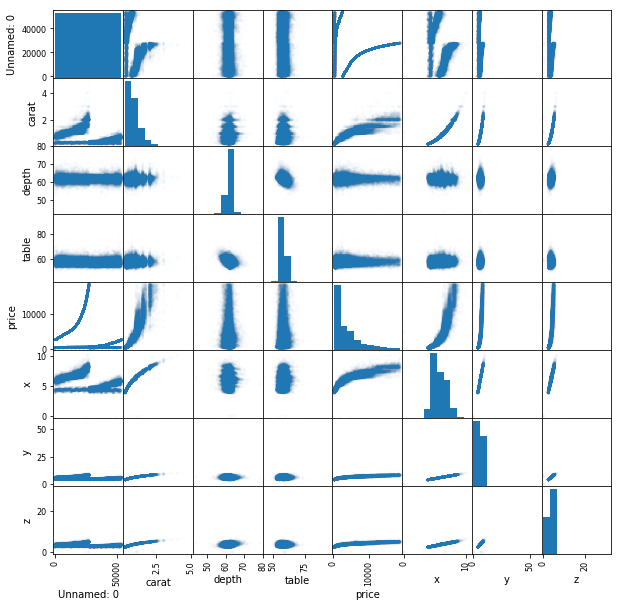

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

Вычислим корелляцию между признаками:

In [23]:
data.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


График зависимости цены от карата:

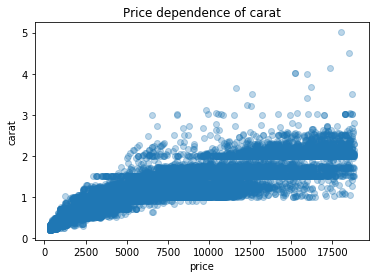

In [24]:
plt.plot(data['price'], data['carat'], 'o', alpha = 0.3)
plt.xlabel('price')
plt.ylabel('carat')
plt.title('Price dependence of carat')
pass

In [25]:
data['price'] < 500

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
53910    False
53911    False
53912    False
53913    False
53914    False
53915    False
53916    False
53917    False
53918    False
53919    False
53920    False
53921    False
53922    False
53923    False
53924    False
53925    False
53926    False
53927    False
53928    False
53929    False
53930    False
53931    False
53932    False
53933    False
53934    False
53935    False
53936    False
53937    False
53938    False
53939    False
Name: price, Length: 53940, dtype: bool

Готовим данные:
========
Разделим имеющиеся столбцы на категориальные и на числовые.

In [26]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['cut', 'color', 'clarity']
['Unnamed: 0', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z']


Для каждого категориального признака выведем все возможные значения:

In [27]:
for c in categorical_columns:
    print(c, data[c].unique())

cut ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


Обрабатываем пропущенные значения:
=================
найдем средние значения всех количественных признаков:

In [28]:
data.median(axis = 0)

Unnamed: 0    26970.50
carat             0.70
depth            61.80
table            57.00
price          2401.00
x                 5.70
y                 5.71
z                 3.53
dtype: float64

In [29]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [30]:
data[numerical_columns].count(axis = 0)

Unnamed: 0    53940
carat         53940
depth         53940
table         53940
price         53940
x             53940
y             53940
z             53940
dtype: int64

In [31]:
data[categorical_columns].count(axis = 0)

cut        53940
color      53940
clarity    53940
dtype: int64

В моем наборе данных пропущенных значений нет.

Векторизация:
===========

In [32]:
data_describe = data.describe(include = [object])
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['cut', 'color', 'clarity']


In [33]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [34]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [35]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'], dtype=object)

Все признаки небинарные

In [36]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2',
       'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')


Нормализация количественных признаков:
======================

In [37]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [38]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [39]:
data_numerical.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04
mean,1.448600e-17,3.774170e-14,5.528923e-13,-3.621533e-14,-6.602421e-15,1.177763e-13,8.638663e-14,-2.522116e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.732003e+00,-1.261446e+00,-1.308748e+01,-6.470013e+00,-9.040868e-01,-5.109073e+00,-5.020884e+00,-5.014510e+00
25%,-8.660013e-01,-8.395154e-01,-5.231005e-01,-6.521325e-01,-7.476738e-01,-9.103164e-01,-8.882717e-01,-8.909378e-01
50%,0.000000e+00,-2.066190e-01,3.531645e-02,-2.046032e-01,-3.839636e-01,-2.777527e-02,-2.147379e-02,-1.237607e-02
75%,8.660013e-01,5.106635e-01,5.239313e-01,6.904554e-01,3.487834e-01,7.210475e-01,7.052356e-01,7.103118e-01
max,1.732003e+00,8.885992e+00,1.204128e+01,1.680151e+01,3.732404e+00,4.465161e+00,4.654922e+01,4.004720e+01


Соединяем все в одну таблицу:
===============
Нормализованные количественные столбцы+векторизованные категориальные:

In [40]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(53940, 28)


In [41]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,53940.000000,53940.000000,...,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,1.448600e-17,3.774170e-14,5.528923e-13,-3.621533e-14,-6.602421e-15,1.177763e-13,8.638663e-14,-2.522116e-13,0.029848,0.090953,...,0.100519,0.052058,0.013737,0.033185,0.242214,0.170449,0.151483,0.227253,0.067760,0.093919
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.170169,0.287545,...,0.300694,0.222146,0.116400,0.179121,0.428427,0.376030,0.358522,0.419061,0.251337,0.291719
min,-1.732003e+00,-1.261446e+00,-1.308748e+01,-6.470013e+00,-9.040868e-01,-5.109073e+00,-5.020884e+00,-5.014510e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.660013e-01,-8.395154e-01,-5.231005e-01,-6.521325e-01,-7.476738e-01,-9.103164e-01,-8.882717e-01,-8.909378e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000e+00,-2.066190e-01,3.531645e-02,-2.046032e-01,-3.839636e-01,-2.777527e-02,-2.147379e-02,-1.237607e-02,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.660013e-01,5.106635e-01,5.239313e-01,6.904554e-01,3.487834e-01,7.210475e-01,7.052356e-01,7.103118e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.732003e+00,8.885992e+00,1.204128e+01,1.680151e+01,3.732404e+00,4.465161e+00,4.654922e+01,4.004720e+01,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
X = data.drop(('price'),axis=1)
y=data['price']
feature_names = X.columns

In [43]:
type(feature_names)

pandas.core.indexes.base.Index

In [44]:
feature_names

Index(['Unnamed: 0', 'carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [45]:
print(X.shape)
print(y.shape)
N, d = X.shape

(53940, 27)
(53940,)


In [46]:
type(X)

pandas.core.frame.DataFrame

In [47]:
type(y)

pandas.core.series.Series

Обучающие и тестовые выборки:

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

37758 16182


In [49]:
37758+16182

53940

In [50]:
KNN
===

SyntaxError: invalid syntax (<ipython-input-50-d7a082412d6e>, line 2)

In [51]:
from sklearn.neighbors import KNeighborsRegressor

knn_r = KNeighborsRegressor(n_neighbors = 10)
knn_r.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [52]:
knn_r

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

Средняя ошибка

In [53]:
y_train_predict_r = knn_r.predict(X_train)
y_test_predict_r = knn_r.predict(X_test)

err_train_r = np.mean(y_train != y_train_predict_r)
err_test_r  = np.mean(y_test  != y_test_predict_r)

print(err_train_r, err_test_r)

0.999655702103 0.999691014708


Подбор параметров
===

Найдем такое значение параметра k, при котором значение ошибки будет минимальным.

In [55]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn_r = KNeighborsRegressor()
grid = GridSearchCV(knn_r, param_grid = {'n_neighbors': nnb}, cv = 10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
cv_err = grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors, cv_err)

0.0306746591762 5 0.969325340824


Проведем классификацию и посчитаем ошибки при данном параметре k=5

In [56]:
knn = KNeighborsRegressor(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.996000847503 0.997528117662


Часть 2
=====

разбиваем данные на обучающую и тестовую выборки

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.033, random_state = 5)
N_test, _ = X_test.shape

In [79]:
#Обучаем регрессор
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes = (100), solver = 'lbfgs', activation = 'logistic', random_state = 22)
mlp_model.fit(X_train, y_train)

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=22, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Проверка качества регрессора

In [80]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

1.0 1.0


Наблюдаем недообучение, т.к. ошибка на тестовой выборке и на обучающей равны
Попробуем использовать персептрон с двумя скрытыми слоями :

In [81]:
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes = (30,10), solver = 'lbfgs', activation = 'logistic', random_state = 22)
mlp_model.fit(X_train, y_train)

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=22, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [82]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

1.0 1.0


Подбор параметра alpha и числа нейронов.
========================

In [84]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPRegressor(alpha = alpha, hidden_layer_sizes = (100), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 22)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

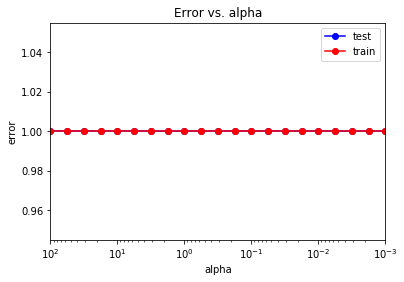

In [85]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [86]:
print(alpha_arr)

[  1.00000000e-03   1.77827941e-03   3.16227766e-03   5.62341325e-03
   1.00000000e-02   1.77827941e-02   3.16227766e-02   5.62341325e-02
   1.00000000e-01   1.77827941e-01   3.16227766e-01   5.62341325e-01
   1.00000000e+00   1.77827941e+00   3.16227766e+00   5.62341325e+00
   1.00000000e+01   1.77827941e+01   3.16227766e+01   5.62341325e+01
   1.00000000e+02]


Минимальное значение ошибки

In [87]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

1.0 1.0


Оптимальное значение альфа

In [88]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print(alpha_opt)

0.001



Найдем оптимальное количество нейронов
========================